## Chi-Square

Data set: Early Stage Diabetes Risk Prediction  
From: https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset?resource=download

In [1]:




import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [4]:
dfsubWL = df.loc[0:,'sudden weight loss']
dfsubWL = dfsubWL.replace('Yes', 0)
dfsubWL = dfsubWL.replace('No', 1)

dfsubG = df.loc[0:, 'weakness']
dfsubG = dfsubG.replace('Yes', 0)
dfsubG = dfsubG.replace('No', 1)

dfsubWL = dfsubWL.to_numpy()
dfsubG = dfsubG.to_numpy()

We will try to identify whether there is a significant relationship between sudden weight loss and weakness by using the dataframe above, and using the Chi - squared method.

$H_0$: there is no significant correlation  
$H_1$: there is a significant correlation

array([1914, 8086])

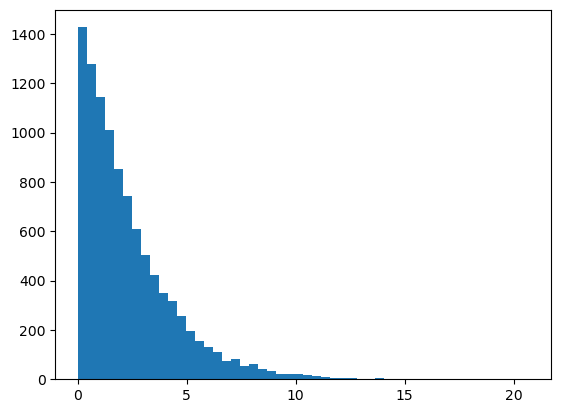

In [5]:
def bootstrap_Chisquare (x1_1, x1_2, x2_1, x2_2, x3_1, x3_2, Nboot, statfun):
    x1_1 = np.array(x1_1)
    x1_2 = np.array(x1_2)

    x2_1 = np.array(x2_1)
    x2_2 = np.array(x2_2)
    
    x3_1 = np.array(x3_1)
    x3_2 = np.array(x3_2)
    
    resample_stat = []
    H1 = 0
    H0 = 0
    
    for k in range(Nboot):
        s1_1, s1_2, s1_3, s1_4 = 0, 0, 0, 0
        s2_1, s2_2, s2_3, s2_4 = 0, 0, 0, 0
        s3_1, s3_2, s3_3, s3_4 = 0, 0, 0, 0
        
        samp1 = [[s1_1, s1_2],[s1_3, s1_4]]
        samp2 = [[s2_1, s2_2],[s2_3, s2_4]]
        samp3 = [[s3_1, s3_2],[s3_3, s3_4]]
        
        index1_1 = np.random.randint(0, len(x1_1), len(x1_1))
        index1_2 = np.random.randint(0, len(x1_2), len(x1_2))
        sample1_1 = x1_1[index1_1]
        sample1_2 = x1_2[index1_2]
        for i in range(0, len(sample1_1)):
            if sample1_1[i] == 0 and sample1_2[i] == 0:
                s1_1 = s1_1 + 1
            elif sample1_1[i] == 1 and sample1_2[i] == 0:
                s1_2 = s1_2 + 1
            elif sample1_1[i] == 0 and sample1_2[i] == 1:
                s1_3 = s1_3 + 1
            elif sample1_1[i] == 1 and sample1_2[i] == 1:
                s1_4 = s1_4 + 1
        
        index2_1 = np.random.randint(0, len(x2_1), len(x2_1))
        index2_2 = np.random.randint(0, len(x2_2), len(x2_2))
        sample2_1 = x2_1[index2_1]
        sample2_2 = x2_2[index2_2]
        for j in range(0, len(sample2_1)):
            if sample2_1[j] == 0 and sample2_2[j] == 0:
                s2_1 = s2_1 + 1
            elif sample2_1[j] == 1 and sample2_2[j] == 0:
                s2_2 = s2_2 + 1
            elif sample2_1[j] == 0 and sample2_2[j] == 1:
                s2_3 = s2_3 + 1
            elif sample2_1[j] == 1 and sample2_2[j] == 1:
                s2_4 = s2_4 + 1
        
        index3_1 = np.random.randint(0, len(x3_1), len(x3_1))
        index3_2 = np.random.randint(0, len(x3_2), len(x3_2))
        sample3_1 = x3_1[index3_1]
        sample3_2 = x3_2[index3_2]
        for l in range(0, len(sample3_1)):
            if sample3_1[l] == 0 and sample3_2[l] == 0:
                s3_1 = s3_1 + 1
            elif sample3_1[l] == 1 and sample3_2[l] == 0:
                s3_2 = s3_2 + 1
            elif sample3_1[l] == 0 and sample3_2[l] == 1:
                s3_3 = s3_3 + 1
            elif sample3_1[l] == 1 and sample3_2[l] == 1:
                s3_4 = s3_4 + 1
                
        samp1 = [[s1_1, s1_2],[s1_3, s1_4]]
        samp2 = [[s2_1, s2_2],[s2_3, s2_4]]
        samp3 = [[s3_1, s3_2],[s3_3, s3_4]]
        
        stat1, p1, dof1, expected1 = statfun(samp1)
        stat2, p2, dof2, expected2 = statfun(samp2)
        stat3, p3, dof3, expected3 = statfun(samp3)
        
        total_stat = stat1 + stat2 + stat3
        resample_stat.append(total_stat)
        
        critical = 3.841
        if (stat1 + stat2 + stat3) >= critical:
            H1 = H1 + 1
        else:
            H0 = H0 + 1
        
        

    resampled_stat = [H1, H0]
    
    plt.hist(resample_stat, bins=50)
    return np.array(resampled_stat)

bootstrap_Chisquare(dfsubWL[0:173], dfsubG[0:173], dfsubWL[173:346], dfsubG[173:346], dfsubWL[346:520], dfsubWL[346:520], 10000, chi2_contingency)

In [6]:
pvalue = 8151 / 10000
pvalue

0.8151

The p value is estimated to have a value of 0.8151 which exceeds 0.05 alpha, therefore we failed to reject the null hypothesis
meaning, there is no significant correlation between sudden weight loss and weakness.

## ANOVA

Data set: Analyzing exam scores   
From: https://www.kaggle.com/datasets/sudhanshu2198/analyzing-exam-scores?resource=download

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

In [8]:
df = pd.read_csv('exams.csv')

In [9]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gender                  1000 non-null   object
 1   race/ethnicity          1000 non-null   object
 2   parent_education_level  1000 non-null   object
 3   lunch                   1000 non-null   object
 4   test_prep_course        1000 non-null   object
 5   math                    1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [11]:
df1 = df[['race/ethnicity', 'math']]

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

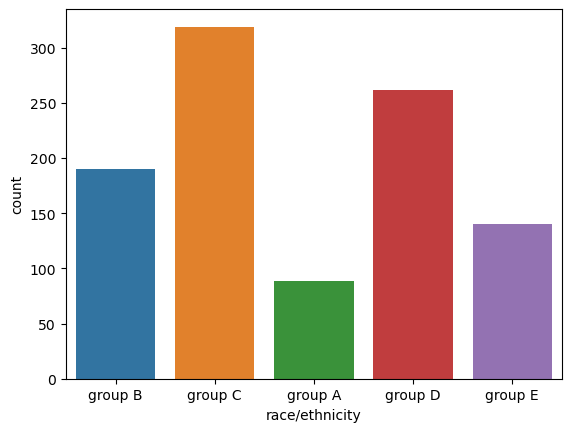

In [12]:
sns.countplot(x = 'race/ethnicity', data = df1)
df1['race/ethnicity'].value_counts()

### Hypothesis Testing

$H_0:$ There is no significant difference between the math scores between different race/ethnicity  
$H_1$: There is a significant difference somewhere between the math scores of different race/ethnicity

Reject $H_0$ if p-value is less than 0.05

In [13]:
A = df1.loc[(df1['race/ethnicity'] == 'group A')]
B = df1.loc[(df1['race/ethnicity'] == 'group B')]
C = df1.loc[(df1['race/ethnicity'] == 'group C')]
D = df1.loc[(df1['race/ethnicity'] == 'group D')]
E = df1.loc[(df1['race/ethnicity'] == 'group E')]

A = A['math'].tolist()
B = B['math'].tolist()
C = C['math'].tolist()
D = D['math'].tolist()
E = E['math'].tolist()

f_oneway(A, B, C, D, E)

F_onewayResult(statistic=14.593885166332635, pvalue=1.3732194030370688e-11)

In __theory__, since the p-value of $1.37*10^{-11}$ is less than 0.05 we reject the $H_0$.

In [14]:
math = df['math']
mList = df['math'].tolist()
bVar = []
for i in range(10000):
    gA = np.random.choice(mList, 89)
    gB = np.random.choice(mList, 190)
    gC = np.random.choice(mList, 319)
    gD = np.random.choice(mList, 262)
    gE = np.random.choice(mList, 140)
    means = [gA.mean(), gB.mean(), gC.mean(), gD.mean(), gE.mean()]
    variance = np.var(means)
    bVar.append(variance)

<Axes: ylabel='Count'>

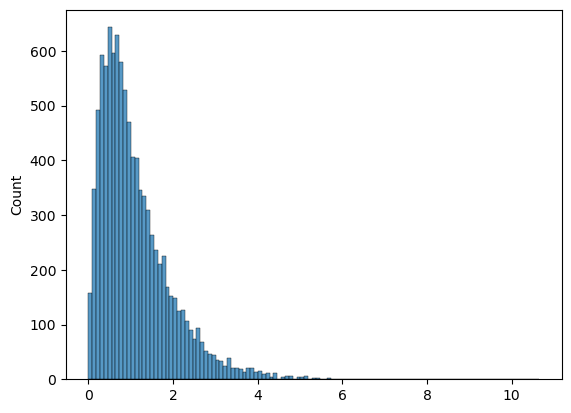

In [15]:
sns.histplot(bVar)

In [16]:
oMeans = [np.mean(A), np.mean(B), np.mean(C), np.mean(D), np.mean(E)]
oVar = np.var(omeans)

NameError: name 'omeans' is not defined

In [ ]:
pValue = sum(bVar > oVar)/100000
pValue

Upon obtaining a p-value of 0 by bootstrapping, we can reject the $H_0$ and conclude that there is a significant difference between the math scores of different race/ethnicity.

In [19]:
df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88
996,male,group C,high school,free/reduced,none,62
997,female,group C,high school,free/reduced,completed,59
998,female,group D,some college,standard,completed,68
